# Non-Point Preserving Prototypes
## GroupBy

In [ ]:
import sys
sys.path.insert(0, '..')

In [5]:
import pandas as pd

In [1]:
from tqdm.autonotebook import tqdm

In [4]:
tqdm.__version__

'4.26.0'

In [6]:
def get_dataframe(nb_file, file):
    artifact_dir = base_dir+nb_file+'/artifacts/'
    return pd.read_csv(artifact_dir+file, index_col=0)

In [7]:
#base_dir = '/home/suhail/Projects/relic/primitives/python/generator/dataset/'
base_dir = '/media/suhail/Data/experiments/reexec/res/'

In [8]:
# Non-Point Preserving Prototypes

# GroupBy detector test:
# Expects Pandas Series Objects
def column_groupby_check(col1, col2):
    # If the columns are same, return False
    #if len(col1) == len(col2):
    #    return False
    src, dst = ((col1,col2) if len(col1) > len(col2) else (col2, col1))
    if(set(src.values) == set(dst.values)): # Check set intersection
        if(len(set(src.values)) == len(dst.values)): # Check if destination set is unique and fully contained
            return True
    else:
        return False

In [9]:
df1 = get_dataframe('nb_331056.ipynb', 'typeLoc.csv')
df2 = get_dataframe('nb_331056.ipynb', 'locationRecode.csv')

col1 = df1['Crime Month']
col2 = df2['Crime Month']

column_groupby_check(col1, col2)

False

In [10]:
import itertools

def df_groupby_check(df1,df2):
    combinations = itertools.product(list(df1), list(df2))
    for col1,col2 in combinations:
        if(column_groupby_check(df1[col1], df2[col2])):
            return str(col1), str(col2)
    return False

In [11]:
df_groupby_check(df1,df2)

('Area', 'Area')

In [15]:
import glob
import os
import itertools

test_nb = 'nb_331056.ipynb'

def get_all_groupbys_wf(nb_name):
    artifact_dir = base_dir+nb_name+'/artifacts/'
    artifacts = [os.path.basename(p) for p in glob.glob(artifact_dir+'*.csv')]
    df_dict = {artifact: get_dataframe(nb_name, artifact) for artifact in artifacts}
    combinations = itertools.combinations(df_dict.keys(),2)
    output_list = []
    for df1, df2 in combinations:
        result = df_groupby_check(df_dict[df1], df_dict[df2])
        if result:
            print(df1+","+df2)
            output_list.append((df1,df2))
    return output_list
    

get_all_groupbys_wf(test_nb)

typeLoc__1.csv,areaCrime.csv
typeLoc__1.csv,locationRecode.csv
typeLoc__1.csv,areaCrime__1.csv
typeLoc.csv,areaCrime.csv
typeLoc.csv,locationRecode.csv
areaCrime.csv,locationRecode.csv
areaCrime.csv,crimes.csv
locationRecode.csv,areaCrime__1.csv
locationRecode.csv,crimes.csv
areaCrime__1.csv,typeLoc__2.csv
areaCrime__1.csv,typeLoc__3.csv
crimesByMonth.csv,crimes.csv


[('typeLoc__1.csv', 'areaCrime.csv'),
 ('typeLoc__1.csv', 'locationRecode.csv'),
 ('typeLoc__1.csv', 'areaCrime__1.csv'),
 ('typeLoc.csv', 'areaCrime.csv'),
 ('typeLoc.csv', 'locationRecode.csv'),
 ('areaCrime.csv', 'locationRecode.csv'),
 ('areaCrime.csv', 'crimes.csv'),
 ('locationRecode.csv', 'areaCrime__1.csv'),
 ('locationRecode.csv', 'crimes.csv'),
 ('areaCrime__1.csv', 'typeLoc__2.csv'),
 ('areaCrime__1.csv', 'typeLoc__3.csv'),
 ('crimesByMonth.csv', 'crimes.csv')]

In [29]:
nb_name='20190802-112245'
get_all_groupbys_wf(nb_name)

True

## Pivot Detection

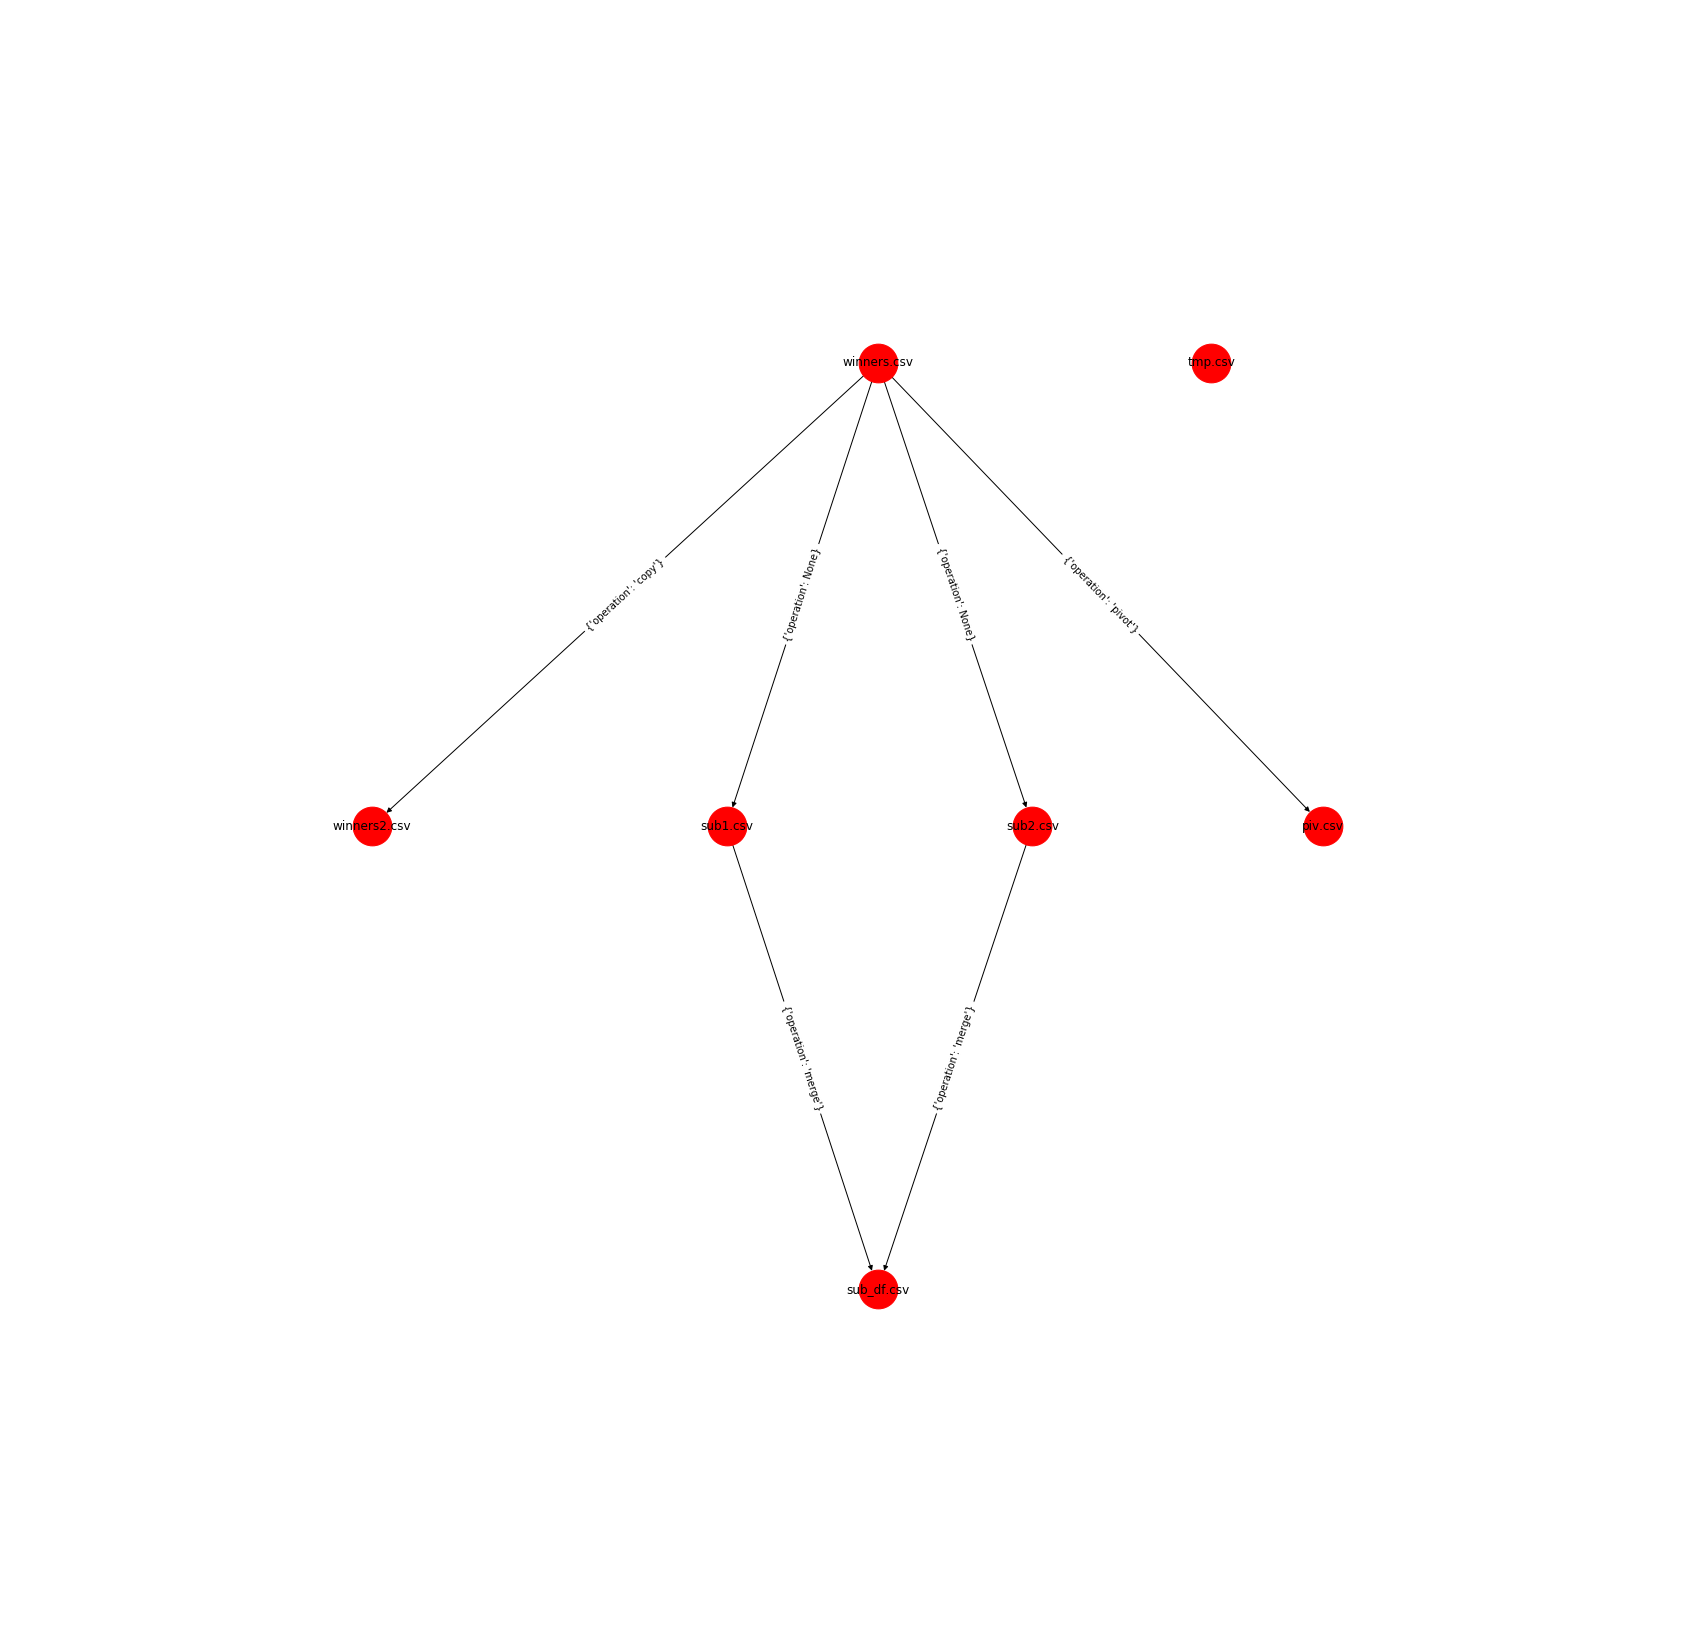

In [61]:
g = display_notebook('nb_986282.ipynb')

In [67]:
#dataframe_table('nb_986282.ipynb')
    
compare_file_pairs('nb_986282.ipynb', 'piv.csv', 'winners.csv')


,Australia,Bahrain,Malaysia,driverId
0,1.0,NaN,NaN,rosberg
1,2.0,NaN,NaN,kevin_magnussen
2,3.0,NaN,NaN,button
3,NaN,NaN,1.0,hamilton
4,NaN,NaN,2.0,rosberg


,carNum,pos,driverId,constructorId,grid,fastlaptime,fastlaprank,race
0,6,1,rosberg,mercedes,3,92.478,1,Australia
1,20,2,kevin_magnussen,mclaren,4,93.066,6,Australia
2,22,3,button,mclaren,10,92.917,5,Australia
3,44,1,hamilton,mercedes,1,103.066,1,Malaysia
4,6,2,rosberg,mercedes,3,103.960,2,Malaysia


0.09090909090909091

In [79]:
def pivot_detector(df1, df2):
    df1_cols = set(df1)
    df2_cols = set(df2)
    
    intersect = False
    
    for col in df1_cols:
        intersect = set(df1[col]).intersection(df2_cols)
        if intersect:
            return col, intersect
    
    
    for col in df2_cols:
        intersect = set(df2[col]).intersection(df1_cols)
        if intersect:
            return col, intersect
    
    
    return intersect
    

In [83]:
df1 = get_dataframe('nb_986282.ipynb', 'winners.csv')
df2 = get_dataframe('nb_986282.ipynb', 'piv.csv')

pivot_detector(df2,df1)

('race', {'Australia', 'Bahrain', 'Malaysia'})

In [81]:
test_nb = 'nb_986282.ipynb'

def get_all_pivots_wf(nb_name):
    artifact_dir = base_dir+nb_name+'/artifacts/'
    artifacts = [os.path.basename(p) for p in glob.glob(artifact_dir+'*.csv')]
    df_dict = {artifact: get_dataframe(nb_name, artifact) for artifact in artifacts}
    combinations = itertools.combinations(df_dict.keys(),2)
    for df1, df2 in combinations:
        result = pivot_detector(df_dict[df1], df_dict[df2])
        if result:
            print(df1, df2, result)
    return True
    

get_all_pivots_wf(test_nb)

winners2.csv piv.csv ('race', {'Australia', 'Bahrain', 'Malaysia'})
winners.csv piv.csv ('race', {'Australia', 'Bahrain', 'Malaysia'})
winners2014start.csv piv.csv ('race', {'Australia', 'Bahrain', 'Malaysia'})


True

## Join Detector

In [16]:
import itertools
from itertools import combinations, chain

def generate_common_lattice(df1,df2):
    df1_cols = set(df1)
    df2_cols = set(df2)
    
    common_cols = df1_cols.intersection(df2_cols)
    #print(common_cols)
    
    lattice = [list(itertools.combinations(common_cols, i)) for i in range(1,len(common_cols)+1)]
            
    return lattice


def check_col_containment(df1, df2, colname, col2name=None):
    if(col2name==None):
        col2name = colname
    return set(df1[colname]).issubset(set(df2[col2name]))


def check_col_group_containment(df1, df2, colgroup, colgroup2=None):
    if(colgroup2==None):
        colgroup2 = colgroup
    
    df1valset = set(frozenset(u) for u in df1[list(colgroup)].values.tolist())
    df2valset = set(frozenset(u) for u in df2[list(colgroup2)].values.tolist())
    
    #print(df2valset)

    return df1valset.issubset(df2valset)

def remove_tup_lattice(lattice, badtup):
    # TODO: start comparing from len(badtup) level upwards
    for i in range(len(lattice)):
        level = lattice[i]
        new_level = [item for item in level if not set(badtup).issubset(set(item))]
        lattice[i] = new_level
    #print(lattice)
    return lattice

# Check for df1 >= df2 and max columns contained therein
def get_max_coherent_columns(df1,df2):
    lattice = generate_common_lattice(df1,df2)
    
    # All common columns are coherent at start
    coherent_cols = set(itertools.chain(*lattice[0])) 
    #return lattice

    for i in range(len(lattice)):
        level = lattice[i]
        new_lattice = lattice
        for tup in level:
            contained = check_col_group_containment(df1,df2,tup)
            if not contained:
                #print('removing', tup)
                new_lattice = remove_tup_lattice(new_lattice, tup)
        lattice = new_lattice
        
        #return lattice
    
    non_empty = [l for l in lattice if len(l)>0]
    if non_empty:
        return  non_empty[-1][0]
    return []
    

In [17]:
df1 = get_dataframe('nb_331056.ipynb', 'typeLoc.csv')
df2 = get_dataframe('nb_331056.ipynb', 'typeLoc__1.csv')
get_max_coherent_columns(df2,df1)

('Outcome Month', 'Crime type', 'Crime Month', 'Outcome type', 'Area')

In [54]:
df1 = get_dataframe('nb_495072.ipynb', 'contribs.csv')
df2 = get_dataframe('nb_495072.ipynb', 'prop.csv')
j_result = get_dataframe('nb_495072.ipynb', 'merged.csv')
#get_max_coherent_columns(df2,df1)

In [58]:
set(df1).union(set(df2)) - set(j_result)

{'committee_name'}

In [71]:
common_cols = set(df1).intersection(set(j_result))
check_col_group_containment(j_result, df1, common_cols)

True

In [18]:
from tqdm import tqdm_notebook

def get_all_joins_wf(nb_name):
    joins = []
    artifact_dir = base_dir+nb_name+'/artifacts/'
    artifacts = [os.path.basename(p) for p in glob.glob(artifact_dir+'*.csv')]
    df_dict = {artifact: get_dataframe(nb_name, artifact) for artifact in artifacts}
    combos = itertools.combinations(df_dict.keys(),3)
    for combo in tqdm_notebook(combos):
        #print(combo)
        sizes = {x: len(set(df_dict[x])) for x in combo}
        if max(sizes.values())==min(sizes.values()):
            continue
        join_dest = list(sizes.keys())[list(sizes.values()).index(max(sizes.values()))] 
        join_sources = tuple(x for x in combo if x is not join_dest)
        
        if set(df_dict[join_sources[0]]).union(set(df_dict[join_sources[1]])) == set(df_dict[join_dest]):
            # print ('Column Union Match:', join_dest, join_sources)
            
            coherent_1 = get_max_coherent_columns(df_dict[join_sources[0]], df_dict[join_dest])
            coherent_2 = get_max_coherent_columns(df_dict[join_sources[1]], df_dict[join_dest])
            
            # Check if the coherent columns generate the output set
            if set(coherent_1).union(set(coherent_2)) == set(df_dict[join_dest]):
                print('coherent:', (join_dest, join_sources))
                if set(coherent_1).intersection(set(coherent_2)): # Check if the intersection is not null
                    print('intersection: ', (join_dest, join_sources))
                    joins.append((join_dest, join_sources))
        
    return joins
        



In [21]:
test_nb = 'nb_986282.ipynb'
%prun get_all_joins_wf(test_nb)

coherent: ('winners2.csv', ('sub2.csv', 'winners.csv'))
intersection:  ('winners2.csv', ('sub2.csv', 'winners.csv'))
coherent: ('sub_df.csv', ('sub2.csv', 'sub1.csv'))
intersection:  ('sub_df.csv', ('sub2.csv', 'sub1.csv'))
coherent: ('winners2.csv', ('sub1.csv', 'winners.csv'))
intersection:  ('winners2.csv', ('sub1.csv', 'winners.csv'))
coherent: ('winners2.csv', ('sub_df.csv', 'winners.csv'))
intersection:  ('winners2.csv', ('sub_df.csv', 'winners.csv'))
coherent: ('winners2.csv', ('winners.csv', 'winners2014start.csv'))
intersection:  ('winners2.csv', ('winners.csv', 'winners2014start.csv'))

 

In [ ]:
threshold = 0.1

def compute_join_containments(nb_name):
    joins = []
    artifact_dir = base_dir+nb_name+'/artifacts/'
    artifacts = [os.path.basename(p) for p in glob.glob(artifact_dir+'*.csv')]
    df_dict = {artifact: get_dataframe(nb_name, artifact) for artifact in artifacts}
    combos = itertools.combinations(df_dict.keys(),3)
    for combo in tqdm_notebook(combos):
        
    
    return joins